<a href="https://colab.research.google.com/github/Tecindes/ChallengeONE__/blob/main/TelecomX_parte2_latam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd

In [13]:


# URL raw del archivo CSV (ajusta con tu repo y path)
url_csv = 'https://raw.githubusercontent.com/Tecindes/ChallengeONE__/refs/heads/main/reporte.csv'


# Cargar el CSV directamente como DataFrame
df = pd.read_csv(url_csv)

# Vista previa
df.sample(5)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,SeniorLabel,ChurnLabel
862,1251-STYSZ,No,Female,1,No,No,4,Yes,Yes,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,80.25,303.70,Sí,0
2627,3737-GCSPV,Yes,Female,0,Yes,No,11,Yes,Yes,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),96.20,1222.05,No,1
6143,8706-HRADD,No,Male,0,No,No,21,No,No phone service,DSL,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,43.55,1011.50,No,0
422,0621-HJWXJ,No,Female,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,No,Month-to-month,Yes,Bank transfer (automatic),81.55,5029.05,No,0
2055,2959-FENLU,No,Female,0,No,No,9,Yes,No,Fiber optic,...,No,No,Yes,Month-to-month,Yes,Credit card (automatic),85.30,781.40,No,0


In [14]:
def clasificar_variable(col):
    if pd.api.types.is_numeric_dtype(col):
        if col.nunique() <= 10:
            return 'Discreta'
        else:
            return 'Continua'
    elif col.nunique() == 2:
        return 'Binaria'
    elif pd.api.types.is_string_dtype(col):
        return 'Categórica'
    else:
        return 'Desconocida'

In [16]:
clasificacion = df.apply(clasificar_variable)
clasificacion

,0
customerID,Categórica
Churn,Binaria
customer.gender,Binaria
customer.SeniorCitizen,Discreta
customer.Partner,Binaria
customer.Dependents,Binaria
customer.tenure,Continua
phone.PhoneService,Binaria
phone.MultipleLines,Categórica
internet.InternetService,Categórica


In [17]:
def clasificar_variable(col):
    if pd.api.types.is_numeric_dtype(col):
        return 'Cuantitativa continua' if col.nunique() > 10 else 'Cuantitativa discreta'
    elif col.nunique() == 2:
        return 'Cualitativa binaria'
    elif pd.api.types.is_object_dtype(col):
        return 'Cualitativa nominal u ordinal'
    else:
        return 'Tipo desconocido'

def generar_reporte(df, nombre_archivo='reporte_variables.md'):
    with open(nombre_archivo, 'w', encoding='utf-8') as f:
        f.write(f'# Clasificación de Variables\n\n')
        for col in df.columns:
            tipo = clasificar_variable(df[col])
            f.write(f"- **{col}**: {tipo}\n")

In [18]:
def clasificar_simple_variable(col):
    if pd.api.types.is_numeric_dtype(col):
        return 'Cuantitativa'
    elif col.nunique() == 2:
        return 'Cualitativa'
    elif pd.api.types.is_object_dtype(col):
        return 'Cualitativa'
    else:
        return 'Desconocido'

In [19]:
df.columns


Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'SeniorLabel',
       'ChurnLabel'],
      dtype='object')

In [20]:
df.drop(['customerID','SeniorLabel','ChurnLabel'], axis=1, inplace=True)

In [21]:
df.columns

Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [22]:
Cuantitativa=[]
Cualitativa=[]
for col in df.columns:
    tipo = clasificar_simple_variable(df[col])
    if tipo == 'Cuantitativa':
        Cuantitativa.append(col)
    elif tipo == 'Cualitativa':
        Cualitativa.append(col)

print(Cuantitativa)
print(Cualitativa)

['customer.SeniorCitizen', 'customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']
['Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod']


In [ ]:
dis_frec_cualitativa=[]
for col in Cualitativa:
  frecuencia=df[col].value_counts()
  porcentaje=df[col].value_counts(normalize=True).round(4)*100
  dis_frec_cualitativa.append(pd.DataFrame({'Frecuencia':frecuencia,'Porcentaje':porcentaje}))
dis_frec_cualitativa[1]


,Frecuencia,Porcentaje
customer.gender,,
Male,3555,50.48
Female,3488,49.52


In [ ]:
dis_frec_cualitativa_dict = {}
for col in Cualitativa:
    frecuencia = df[col].value_counts()
    porcentaje = df[col].value_counts(normalize=True).round(4) * 100
    dis_frec_cualitativa_dict[col] = pd.DataFrame({
        'Frecuencia': frecuencia,
        'Porcentaje': porcentaje
    })


In [ ]:
dis_frec_cualitativa_dict['customer.gender']

,Frecuencia,Porcentaje
customer.gender,,
Male,3555,50.48
Female,3488,49.52


In [ ]:
dis_frec_cualitativa_dict

{'Churn':        Frecuencia  Porcentaje
 Churn                        
 No           5174       73.46
 Yes          1869       26.54,
 'customer.gender':                  Frecuencia  Porcentaje
 customer.gender                        
 Male                   3555       50.48
 Female                 3488       49.52,
 'customer.Partner':                   Frecuencia  Porcentaje
 customer.Partner                        
 No                      3641        51.7
 Yes                     3402        48.3,
 'customer.Dependents':                      Frecuencia  Porcentaje
 customer.Dependents                        
 No                         4933       70.04
 Yes                        2110       29.96,
 'phone.PhoneService':                     Frecuencia  Porcentaje
 phone.PhoneService                        
 Yes                       6361       90.32
 No                         682        9.68,
 'phone.MultipleLines':                      Frecuencia  Porcentaje
 phone.MultipleLines  

In [ ]:
pd.crosstab(df['Churn'],df['customer.gender'], aggfunc='sum', values=df['account.Charges.Total'])

customer.gender,Female,Male
Churn,,
No,6599274.45,6593967.35
Yes,1353079.75,1509847.15


In [ ]:
import pandas as pd

# Carga del CSV desde GitHub
url = 'https://raw.githubusercontent.com/Tecindes/ChallengeONE__/refs/heads/main/reporte.csv'
df = pd.read_csv(url)

# Vista general y revisión de nulos
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

In [ ]:
df.describe().to_markdown("resumen_datos.md")

In [ ]:
# One-Hot Encoding (ideal si no hay demasiadas categorías)
df_encoded = pd.get_dummies(df, drop_first=True)

In [ ]:
df_encoded

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,ChurnLabel,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check,SeniorLabel_Sí
0,0,9,65.60,593.30,0,False,False,False,False,False,...,True,False,False,True,False,True,False,False,True,False
1,0,9,59.90,542.40,0,True,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,0,4,73.90,280.85,1,False,True,False,False,False,...,False,False,False,False,False,True,False,True,False,False
3,1,13,98.00,1237.85,1,False,False,True,False,False,...,True,False,True,False,False,True,False,True,False,True
4,1,3,83.90,267.40,1,False,False,False,True,False,...,True,False,False,False,False,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,55.15,742.90,0,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
7039,0,22,85.10,1873.70,1,False,False,False,False,False,...,False,False,True,False,False,True,False,True,False,False
7040,0,2,50.30,92.75,0,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
7041,0,67,67.85,4627.65,0,False,False,False,False,False,...,False,False,True,False,True,False,False,False,True,False


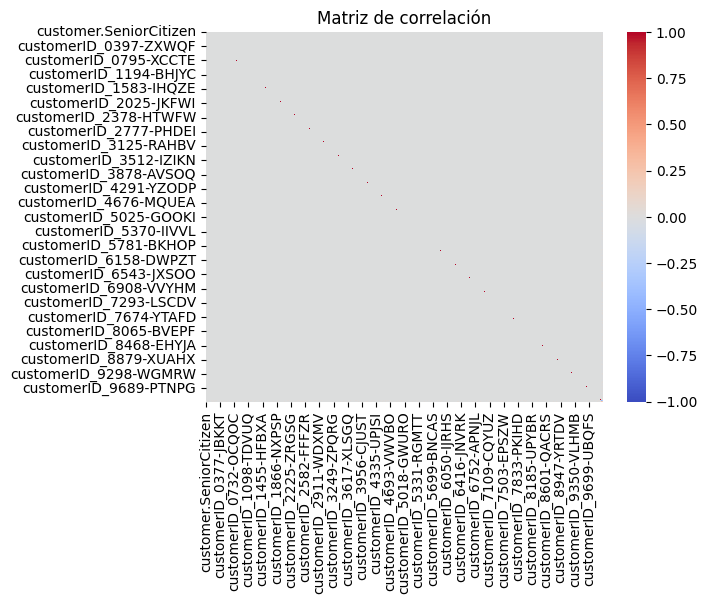

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlación
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()